# IIT Bombay Techfest 2021 - 2022

## Problem Statement 
Tata Communication portfolios are mapped to fast-track Digital Transformation Journey across Cloud and Data Centre, Business Collaboration, Managed Security, Network, Mobility, Voice and Media.

In this challenge, participants are expected to build a projection of the business potential for each of the 3915 regions (given in the dataset) for the next 12 months. 

## Data 
There are a total of 3915 regions in the dataset 

Train Dataset - Has the business potential of 3915 regions for months 1 to 72

Evaluation Dataset - You must predict the business potential of 3915 regions for Month 73 to Month 87

## Evaluation 
Submissions are evaluated using a custom evaluation metric that uses Mean Absolute Percentage Error (MAPE) value. 

Refer link : https://colab.research.google.com/drive/1fN0E2BNUsOyL5HUBR1OhKAJbFBbJi_Gs#scrollTo=PjPbVgXhAQ8p

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [1]:
! pip install statsmodels

In [3]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 32.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [6]:
from statsmodels.tsa.arima.model import ARIMA

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

df = pd.read_csv("drive/MyDrive/Datathon_/Train Set.csv")

In [8]:
date_range = pd.date_range(start = "2013/1/1" , end = "2018/12/31" , freq = "MS")
predictions_date_range = pd.dare_range(start ="2020/1/1", end = "2021/3/31")

In [11]:
melt_data = df.melt(id_vars  = "Region_Name",
    var_name="Month",
    value_name='Potential')
melt_data["Month"] = melt_data["Month"].str.extract('(\d+)', expand = False).astype(int)
melt_data["Region_Name"] = melt_data["Region_Name"].str.extract('(\d+)', expand = False).astype(int)
melt_data.sort_values(by = ["Region_Name" , "Month"] , inplace = True, ignore_index=True)

In [12]:
melt_data.head()

,Region_Name,Month,Potential
0,1,1,0.154324
1,1,2,0.122901
2,1,3,0.127583
3,1,4,0.501557
4,1,5,0.103551


In [13]:
df_region = df["Region_Name"]
df_month = df.drop("Region_Name" , axis = 1)
df_region.rename(None , inplace = True)
df_month.columns = date_range
data = df_month.T
data.columns = df_region

## EDA

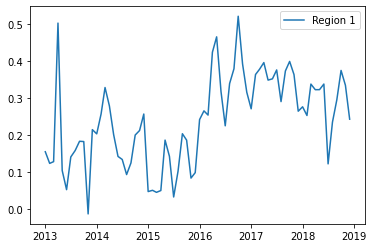

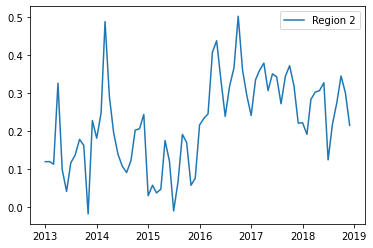

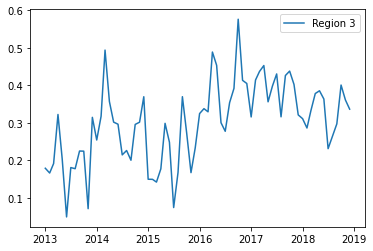

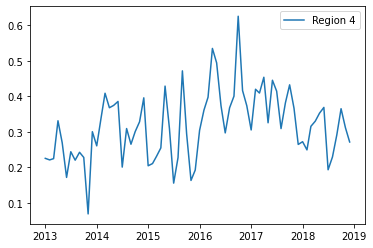

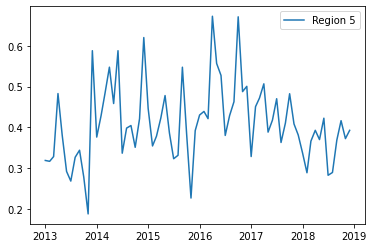

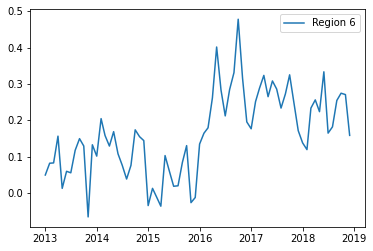

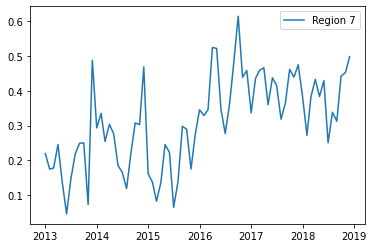

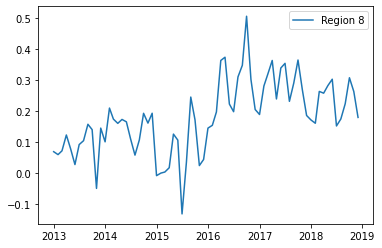

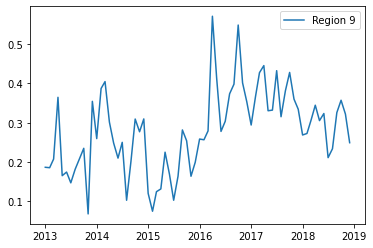

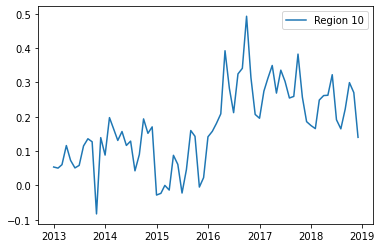

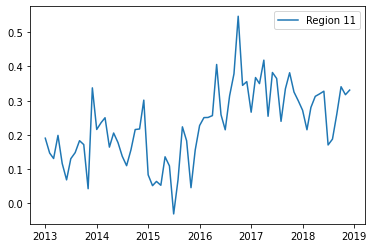

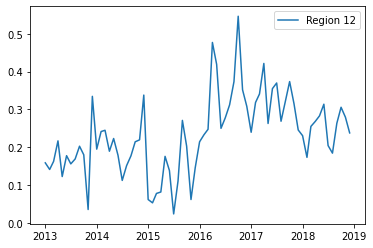

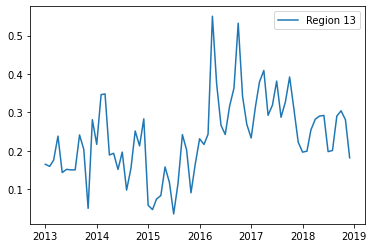

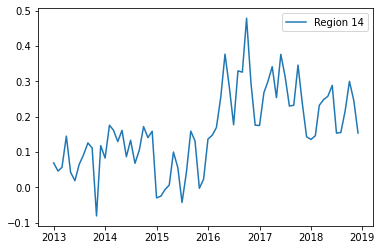

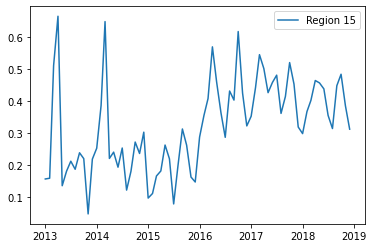

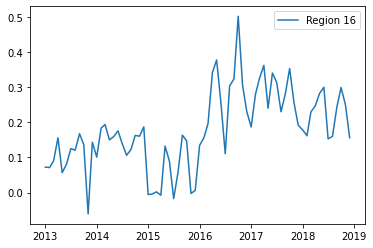

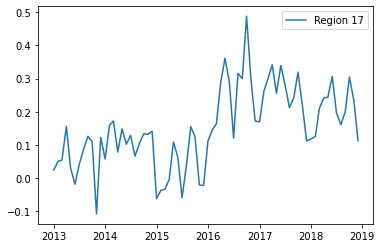

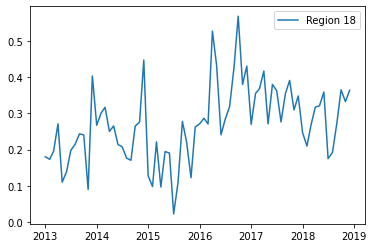

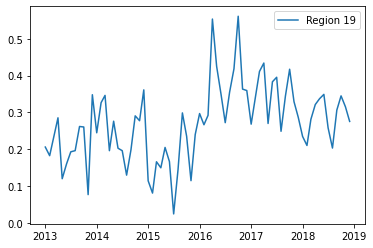

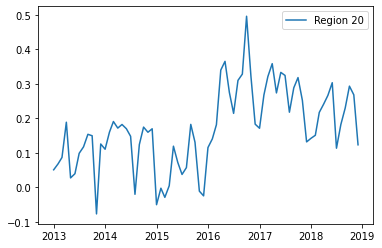

In [14]:
for region in data.columns[:20] :
    plt.subplots()
    plt.plot(data.index , region , data = data)
    plt.legend()

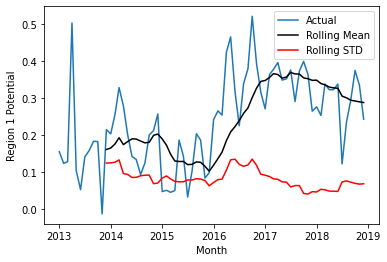

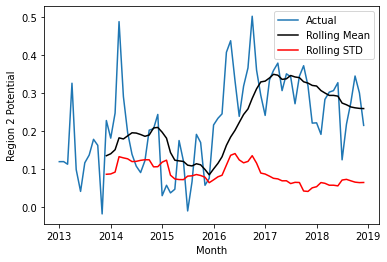

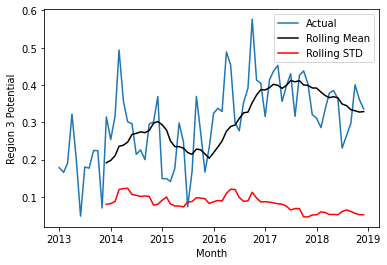

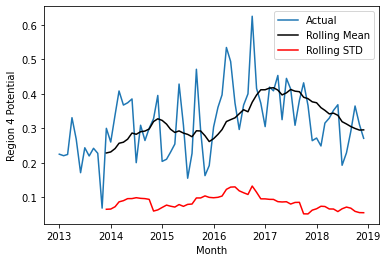

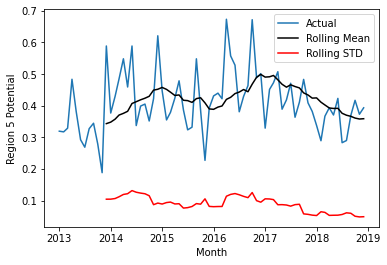

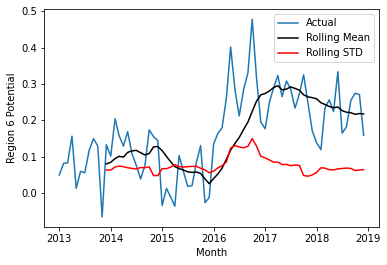

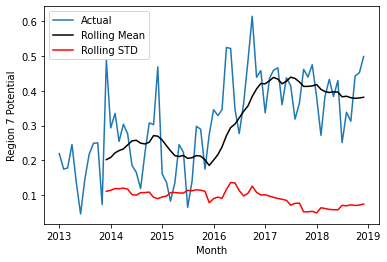

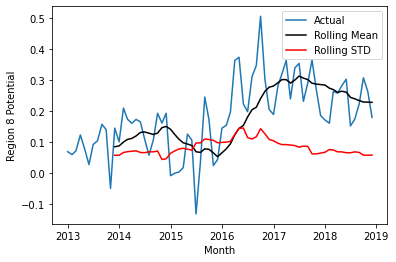

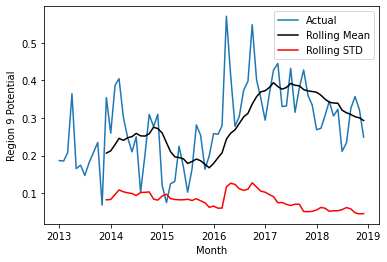

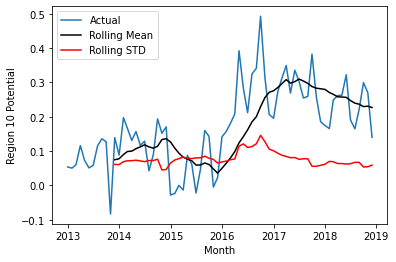

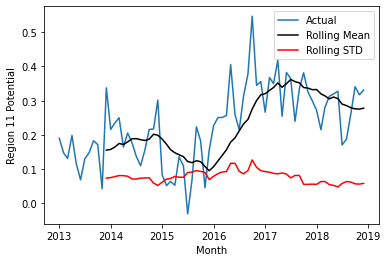

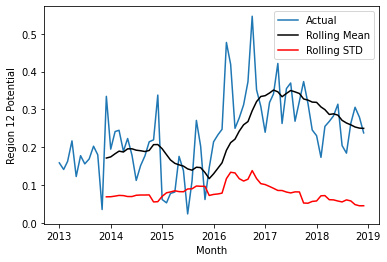

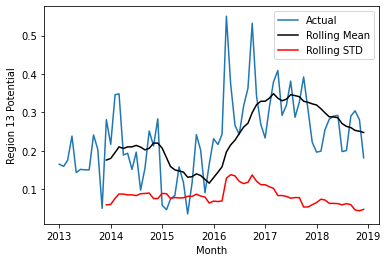

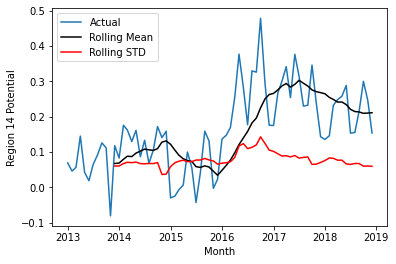

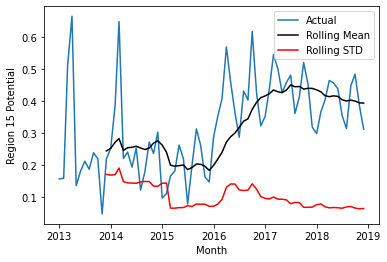

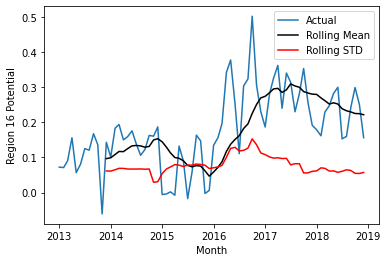

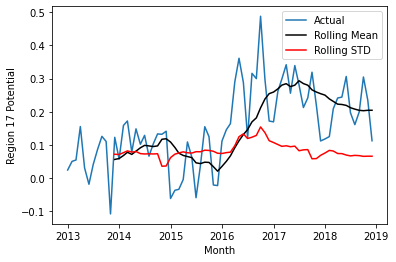

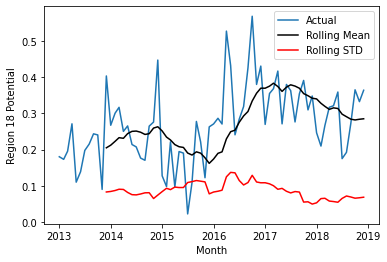

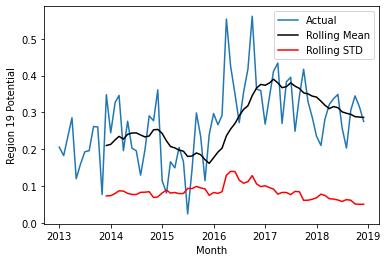

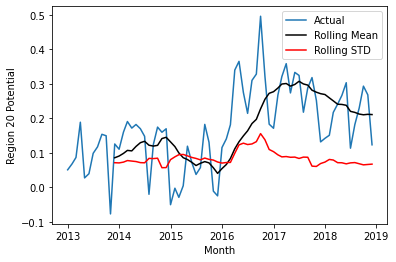

In [15]:
#rolling statistics
for region in data.columns[:20] :
    roll_mean = data[region].rolling(window = 12).mean()
    roll_std = data[region].rolling(window = 12).std()
    plt.subplots()
    actual = plt.plot(data.index , region ,label = "Actual" , data = data)
    mean = plt.plot(roll_mean ,color = "black",label = "Rolling Mean", data = data)
    std = plt.plot(roll_std , color ="red" ,label = "Rolling STD" , data =data)
    plt.xlabel("Month")
    plt.ylabel( region + " Potential")
    plt.legend(loc ="best")
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text major ticklabel objects>)

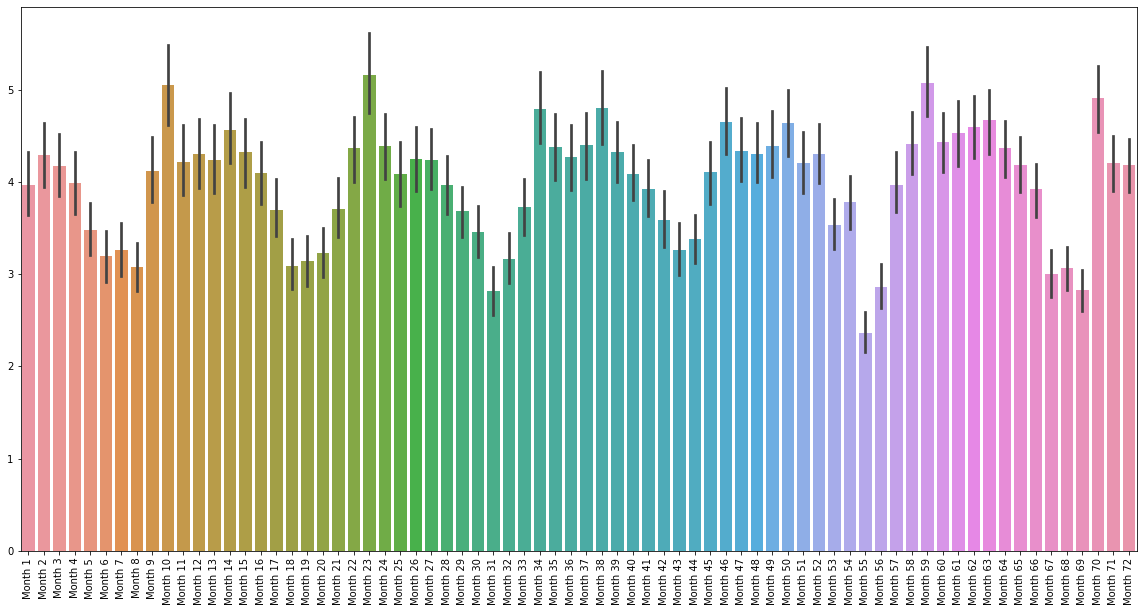

In [16]:
plt.figure(figsize = (20,10))
sns.barplot(data = df)
plt.xticks(rotation = "vertical")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0f8e4b6790>)

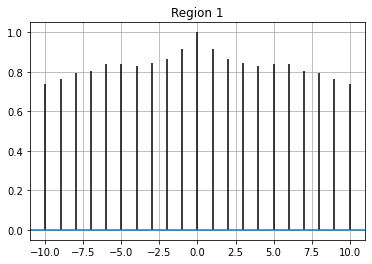

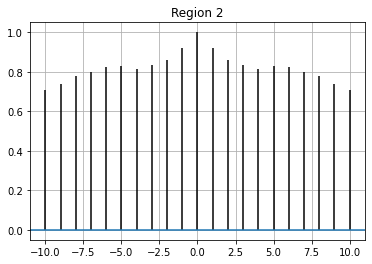

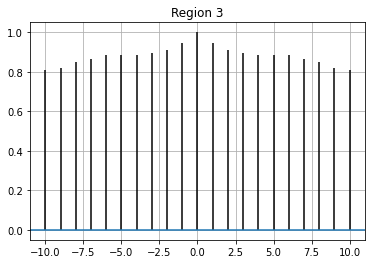

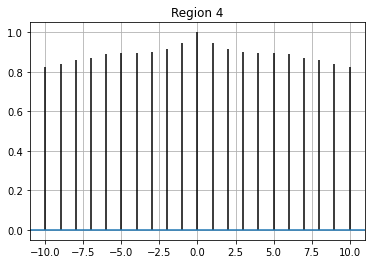

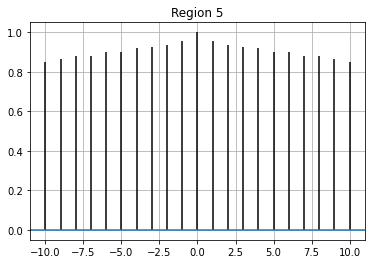

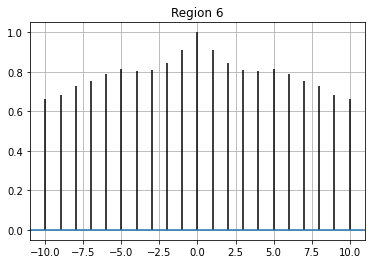

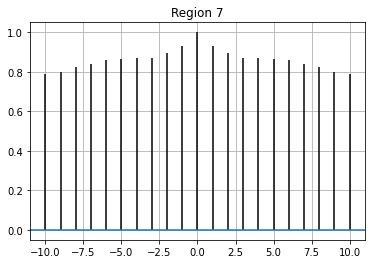

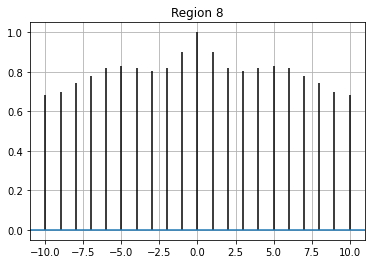

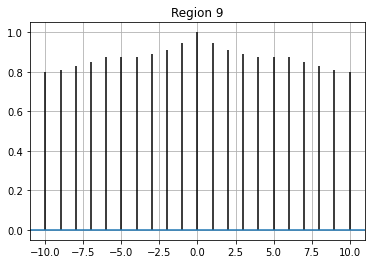

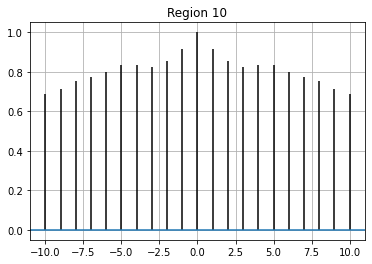

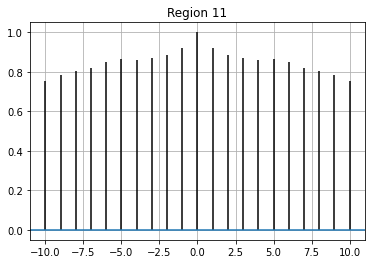

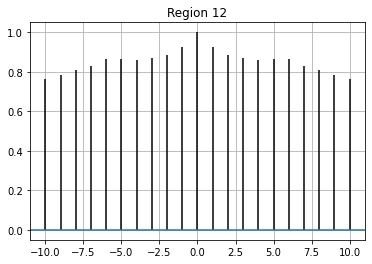

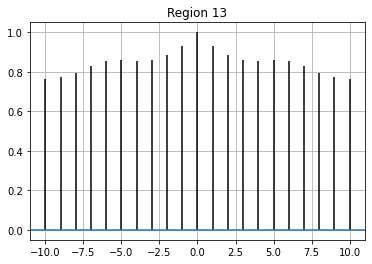

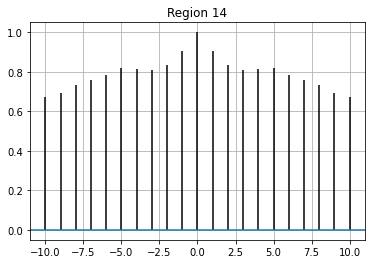

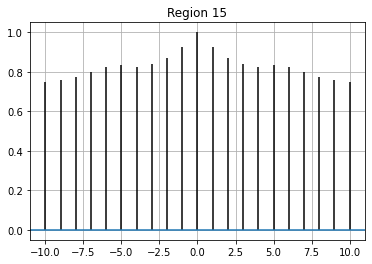

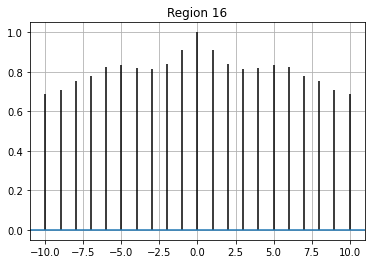

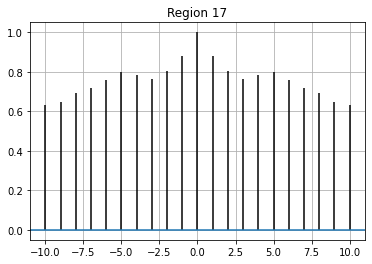

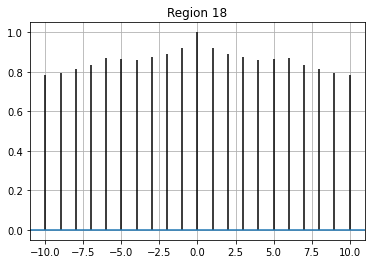

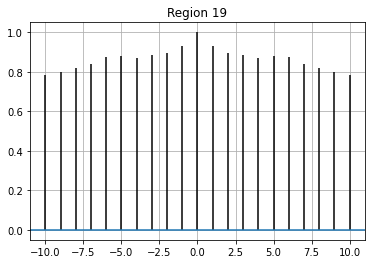

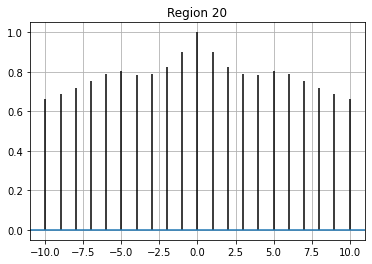

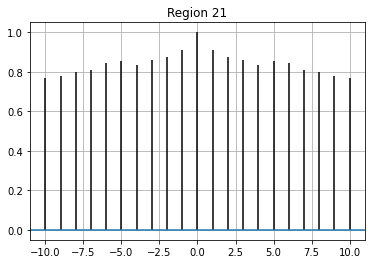

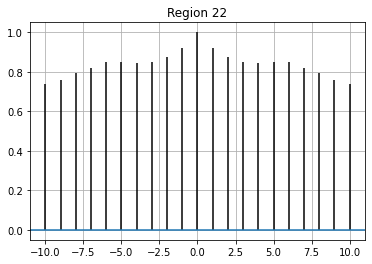

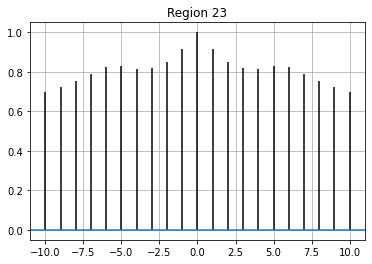

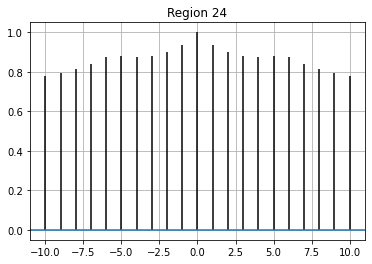

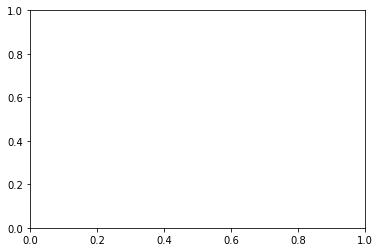

In [21]:

for i in range(1 , 25):
    plt.subplots()
    r1_p = melt_data[melt_data["Region_Name"] == i].Potential
    plt.acorr(r1_p , maxlags = 10)
    plt.title("Region " + str(i))
    plt.grid(True)
plt.subplots() 

# Normalising our data

In [41]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data_df = pd.DataFrame(scaled_data , columns = data.columns , index = date_range)

In [ ]:
scaled_data_df.describe()

,Region 1,Region 2,Region 3,Region 4,Region 5,Region 6,Region 7,Region 8,Region 9,Region 10,Region 11,Region 12,Region 13,Region 14,Region 15,Region 16,Region 17,Region 18,Region 19,Region 20,Region 21,Region 22,Region 23,Region 24,Region 25,Region 26,Region 27,Region 28,Region 29,Region 30,Region 31,Region 32,Region 33,Region 34,Region 35,Region 36,Region 37,Region 38,Region 39,Region 40,...,Region 3876,Region 3877,Region 3878,Region 3879,Region 3880,Region 3881,Region 3882,Region 3883,Region 3884,Region 3885,Region 3886,Region 3887,Region 3888,Region 3889,Region 3890,Region 3891,Region 3892,Region 3893,Region 3894,Region 3895,Region 3896,Region 3897,Region 3898,Region 3899,Region 3900,Region 3901,Region 3902,Region 3903,Region 3904,Region 3905,Region 3906,Region 3907,Region 3908,Region 3909,Region 3910,Region 3911,Region 3912,Region 3913,Region 3914,Region 3915
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.475959,0.463415,0.478383,0.446439,0.459520,0.422443,0.468421,0.488556,0.421401,0.441253,0.450778,0.400809,0.387454,0.435009,0.448749,0.424361,0.435491,0.455662,0.461472,0.432982,0.426708,0.444081,0.435316,0.455000,0.317279,0.430665,0.446584,0.413645,0.420060,0.475263,0.457587,0.454652,0.443735,0.466626,0.495445,0.460300,0.377010,0.449621,0.463672,0.266001,...,0.451273,0.524173,0.450431,0.447028,0.535840,0.429684,0.491187,0.480982,0.500399,0.428474,0.341448,0.491648,0.236501,0.485695,0.463215,0.483501,0.464823,0.446124,0.405084,0.459824,0.464505,0.516740,0.483176,0.555567,0.456095,0.470468,0.491946,0.470959,0.527516,0.483787,0.405425,0.469644,0.435193,0.437082,0.427323,0.413711,0.491276,0.424072,0.483737,0.457437
std,0.228208,0.228728,0.202694,0.173894,0.197267,0.208025,0.228022,0.182744,0.208440,0.201970,0.190309,0.196736,0.201764,0.203307,0.230738,0.195707,0.198331,0.192206,0.191683,0.201575,0.208925,0.208408,0.205414,0.203475,0.215512,0.230413,0.167824,0.204992,0.201361,0.202419,0.206175,0.199621,0.212132,0.213097,0.239937,0.216957,0.216243,0.225546,0.197825,0.142122,...,0.256031,0.243022,0.236709,0.257271,0.244012,0.245996,0.276335,0.271353,0.263461,0.223692,0.229437,0.269614,0.178948,0.265768,0.243551,0.250944,0.253679,0.258301,0.231183,0.252616,0.245077,0.271888,0.279984,0.227594,0.255851,0.257595,0.289256,0.268098,0.267163,0.260854,0.245499,0.261718,0.269936,0.254867,0.181191,0.258606,0.259709,0.256854,0.268496,0.248052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290171,0.269127,0.333124,0.313904,0.333271,0.272787,0.308349,0.372612,0.274705,0.297327,0.320038,0.284114,0.248350,0.297903

## Defining Mape function

In [ ]:

def mape_score(validation_df , predictions_df):
  overall_mape=0
  overall_mape_sum=0  
  for i in range(0, validation_df.shape[0]): #looping through the regions
    region_mape=0
    for j in range(0,12): #looping through the months
      actual_value=validation_df.iloc[i][j]
      predicted_value=predictions_df.iloc[i][j]
      if(actual_value!=0 and predicted_value!=0):
        mape=((actual_value-predicted_value)/actual_value)*100
        if(mape<0):
          mape=mape*(-1)
        region_mape=region_mape+mape
      else:
        pass

    mape_df.at[i,'Mape_score']=region_mape
    overall_mape_sum=overall_mape_sum+region_mape
  overall_mape = overall_mape_sum/validation_df.shape[0]
  return(overall_mape)
  

## Using Auto Arima function to get best pdq order for each region

In [ ]:
step_wise_fit_2 = {}
for region in data.columns:
    step_wise_fit_2[region] = auto_arima(scaled_data_df[region] , 
                                        trace = True , 
                                        error_action='ignore',
                                        suppress_warnings=True,
                                        random_state = 42,
                                       
                                      )

Streaming output truncated to the last 5000 lines.
Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 6.648 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-32.073, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-26.364, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-36.280, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-34.854, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=128.391, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-34.294, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-34.290, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-32.281, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-12.228, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.853 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-35.781, Time=0.05 sec

In [ ]:

scalar_order = pd.DataFrame(step_wise_fit_2, index = date_range)
scalar_order.to_csv("drive/MyDrive/Datathon_/scalar_order.csv" , index = False)
scale_order_df = scalar_order.T["2013-01-01"]

In [ ]:
scale_order_df = pd.DataFrame(scale_order_df)

In [ ]:
scale_order_df.index[0]

'Region 1'

In [33]:
scale_order_df = pd.read_csv("drive/MyDrive/Datathon_/scalar_order.csv")
scale_order_df = scale_order_df.T[0]
scale_order_df = pd.DataFrame(scale_order_df)
scale_order_df.head()

,0
Region 1,"ARIMA(2,1,2)(0,0,0)[0]"
Region 2,"ARIMA(0,1,2)(0,0,0)[0]"
Region 3,"ARIMA(0,1,2)(0,0,0)[0]"
Region 4,"ARIMA(0,1,2)(0,0,0)[0]"
Region 5,"ARIMA(1,0,0)(0,0,0)[0] intercept"


In [ ]:
train = scaled_data_df[0:60]
test = scaled_data_df[60:] 
start = len(train)
end = len(train)+len(test) - 1

In [36]:

order_ = {}
for i in range(len(scale_order_df[0])):
    order_["Region " + str(i+1)] = scale_order_df[0][i][7:12].split(",")

for key in order_ :
  for i in range(len(order_[key])):
    order_[key][i] = int(order_[key][i])
      
train = data[0:60]
test = data[60:] 

In [37]:
len(order_)

3915

In [ ]:

models = {}
exceptions = []
for region in order_.keys(): 
  try:
   
    model = ARIMA(scaled_data[region], order=(order_[region][0],order_[region][1],order_[region][2]))
    model_ = model.fit()
    models[region] = model_
  except (ValueError ,np.linalg.LinAlgError) as error:
    exceptions.append(region)  
    
preds = []
preds_exceptions = []
index = []
for model in models:
  try:
    preds.append(models[model].predict(start = 1 , end = 15 , typ = "levels"))
    index.append(model)
  except TypeError:
    preds_exceptions.append(model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sta

In [ ]:
len(preds) , len(index)

(3915, 3915)

In [43]:
predictions = pd.DataFrame(preds)
predictions = predictions.T
scaler.fit(predictions)
predictions_actual = scaler.inverse_transform(predictions)

In [44]:
predictions = pd.read_csv("drive/MyDrive/Datathon_/prediction_actual.csv")
predictions.set_index("Unnamed: 0" , inplace = True)
predictions.columns = data.columns
predictions = predictions.T

In [45]:
predictions

Unnamed: 0,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01
Region 1,0.314540,0.268320,0.283132,0.699774,0.215166,0.206179,0.338423,0.330922,0.336798,0.357130,0.036201,0.378001,0.283755,0.361507,0.438096
Region 2,0.264320,0.263227,0.258283,0.542398,0.178965,0.187888,0.246988,0.252568,0.313947,0.335667,-0.003351,0.460472,0.252722,0.458347,0.719819
Region 3,0.246220,0.226342,0.267261,0.414794,0.242326,0.092049,0.253707,0.200637,0.280408,0.306603,0.028233,0.437784,0.254672,0.432425,0.600036
Region 4,0.281098,0.273953,0.283497,0.387668,0.298424,0.200762,0.287440,0.248237,0.288331,0.310317,0.049266,0.377709,0.247465,0.392999,0.441107
Region 5,0.403419,0.400176,0.412104,0.498913,0.409476,0.321745,0.329285,0.358906,0.384408,0.402552,0.241001,0.576115,0.412649,0.473519,0.506417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Region 3911,0.518581,0.650789,0.485441,0.256604,0.143919,0.184453,0.270986,0.320215,0.313741,0.807730,0.714506,0.683005,0.318796,0.313982,0.339095
Region 3912,0.240943,0.344866,0.355107,0.311774,0.248986,0.098919,0.135139,0.189394,0.220313,0.320556,0.049893,0.350446,0.191881,0.366278,0.401239
Region 3913,0.234547,0.311252,0.368715,0.356078,0.236248,0.022894,-0.005608,0.071597,0.121516,0.201064,0.057173,0.263989,0.043564,0.365375,0.348075
Region 3914,0.499855,0.498326,0.728633,0.392972,0.158886,0.304867,0.125890,0.179886,0.220404,0.835051,0.586907,0.539761,0.274961,0.640213,0.763925
